<a href="https://colab.research.google.com/github/Iamfouzia/AI_Machine_Learning_projects/blob/main/Tweet_Sentiment_Analyzer_NLP_Based_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

df = pd.read_csv("/content/drive/MyDrive/tweets2.csv", encoding='latin1')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


# Download required NLTK data
nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)

print("✅ Libraries imported successfully!")

# Test with TextBlob
def test_textblob():
    text = "I love this product! It's amazing."
    analysis = TextBlob(text)
    print(f"TextBlob Test: '{text}'")
    print(f"Sentiment: {analysis.sentiment}")
    print(f"Polarity: {analysis.sentiment.polarity}")
    print()

# Test with VADER
def test_vader():
    sid = SentimentIntensityAnalyzer()
    text = "I love this product! It's amazing. 😍"
    scores = sid.polarity_scores(text)
    print(f"VADER Test: '{text}'")
    print(f"Scores: {scores}")
    print()

if __name__ == "__main__":
    test_textblob()
    test_vader()
    print("🎉 All tests passed! You're ready for sentiment analysis.")

✅ Libraries imported successfully!
TextBlob Test: 'I love this product! It's amazing.'
Sentiment: Sentiment(polarity=0.6125, subjectivity=0.75)
Polarity: 0.6125

VADER Test: 'I love this product! It's amazing. 😍'
Scores: {'neg': 0.0, 'neu': 0.266, 'pos': 0.734, 'compound': 0.8516}

🎉 All tests passed! You're ready for sentiment analysis.


In [ ]:
print(df.shape)

(1048575, 9)


In [ ]:
print(df.info())
print(df.head())

# Rename text column if needed
# Example: if your text column name is 'Text' or 'content'
df.rename(columns={'Text': 'tweet'}, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

#  SENTIMENT ANALYSIS PROJECT

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ Dataset Loaded Successfully!

   Target          ID                          Date      flag           User  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                Text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew   
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  --

/tmp/ipython-input-2673414709.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_vader', palette='coolwarm')


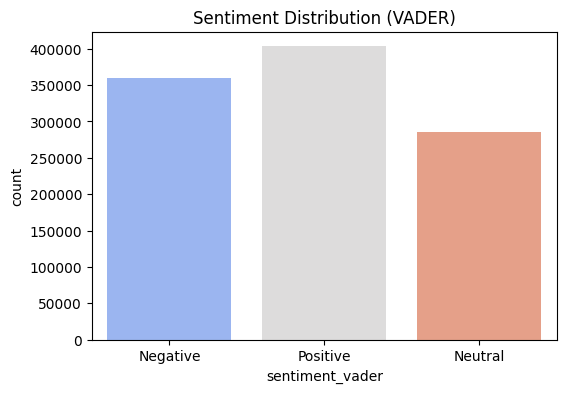

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
#  SENTIMENT ANALYSIS PROJECT (tweets.csv)


# INSTALL DEPENDENCIES
!pip install pandas numpy matplotlib seaborn scikit-learn nltk textblob transformers --quiet

# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# DOWNLOAD NLTK DATA
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')

# LOAD YOUR DATA

df = pd.read_csv("/content/drive/MyDrive/tweets.csv", encoding='latin1')
print("✅ Dataset Loaded Successfully!\n")
print(df.head())
print(df.info())

# Identify text column automatically
text_column = None
for col in df.columns:
    if 'text' in col.lower() or 'tweet' in col.lower():
        text_column = col
        break

if text_column is None:
    raise ValueError(" No text/tweet column found in your CSV!")

print(f"\n✅ Detected Text Column: '{text_column}'")

#TEXT PREPROCESSING
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text)
    text = re.sub(r'http\S+', '', text)        # Remove URLs
    text = re.sub(r'@\w+', '', text)           # Remove mentions
    text = re.sub(r'#', '', text)              # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)    # Remove special chars/numbers
    text = text.lower()                        # Lowercase
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['cleaned_text'] = df[text_column].apply(clean_text)
print("\n✅ Text Cleaning Done!\n")
print(df[[text_column, 'cleaned_text']].head())

# TEXTBLOB SENTIMENT
def get_sentiment_textblob(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment_textblob'] = df['cleaned_text'].apply(get_sentiment_textblob)
print("\n✅ Sentiment Analysis (TextBlob) Completed!\n")
print(df[['cleaned_text', 'sentiment_textblob']].head())

# VADER SENTIMENT
sid = SentimentIntensityAnalyzer()
def get_sentiment_vader(text):
    scores = sid.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_vader'] = df[text_column].apply(get_sentiment_vader)
print("\n✅ Sentiment Analysis (VADER) Completed!\n")
print(df[[text_column, 'sentiment_vader']].head())

# VISUALIZE SENTIMENT (VADER)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment_vader', palette='coolwarm')
plt.title("Sentiment Distribution (VADER)")
plt.show()

# TRANSFORMER MODEL (BERT)
classifier = pipeline('sentiment-analysis')
df['sentiment_bert'] = df[text_column].apply(lambda x: classifier(x)[0]['label'])
print("\n✅ Sentiment Analysis (BERT Transformer) Completed!\n")
print(df[[text_column, 'sentiment_bert']].head())

# SAVE FINAL OUTPUT
output_path = '/content/tweets_sentiment_results.csv'
df.to_csv(output_path, index=False)
print(f"\n✅ All Done! Results saved to: {output_path}")


# AI-Powered Tweet Sentiment Analyzer: NLP-Based Insight Dashboard

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Libraries & NLTK resources ready!
✅ Dataset loaded successfully!

   Target          ID                          Date      flag           User  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                Text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew   
✅ Text cleaning completed!
                                        cleaned_text
0  upset cant update facebook texting might

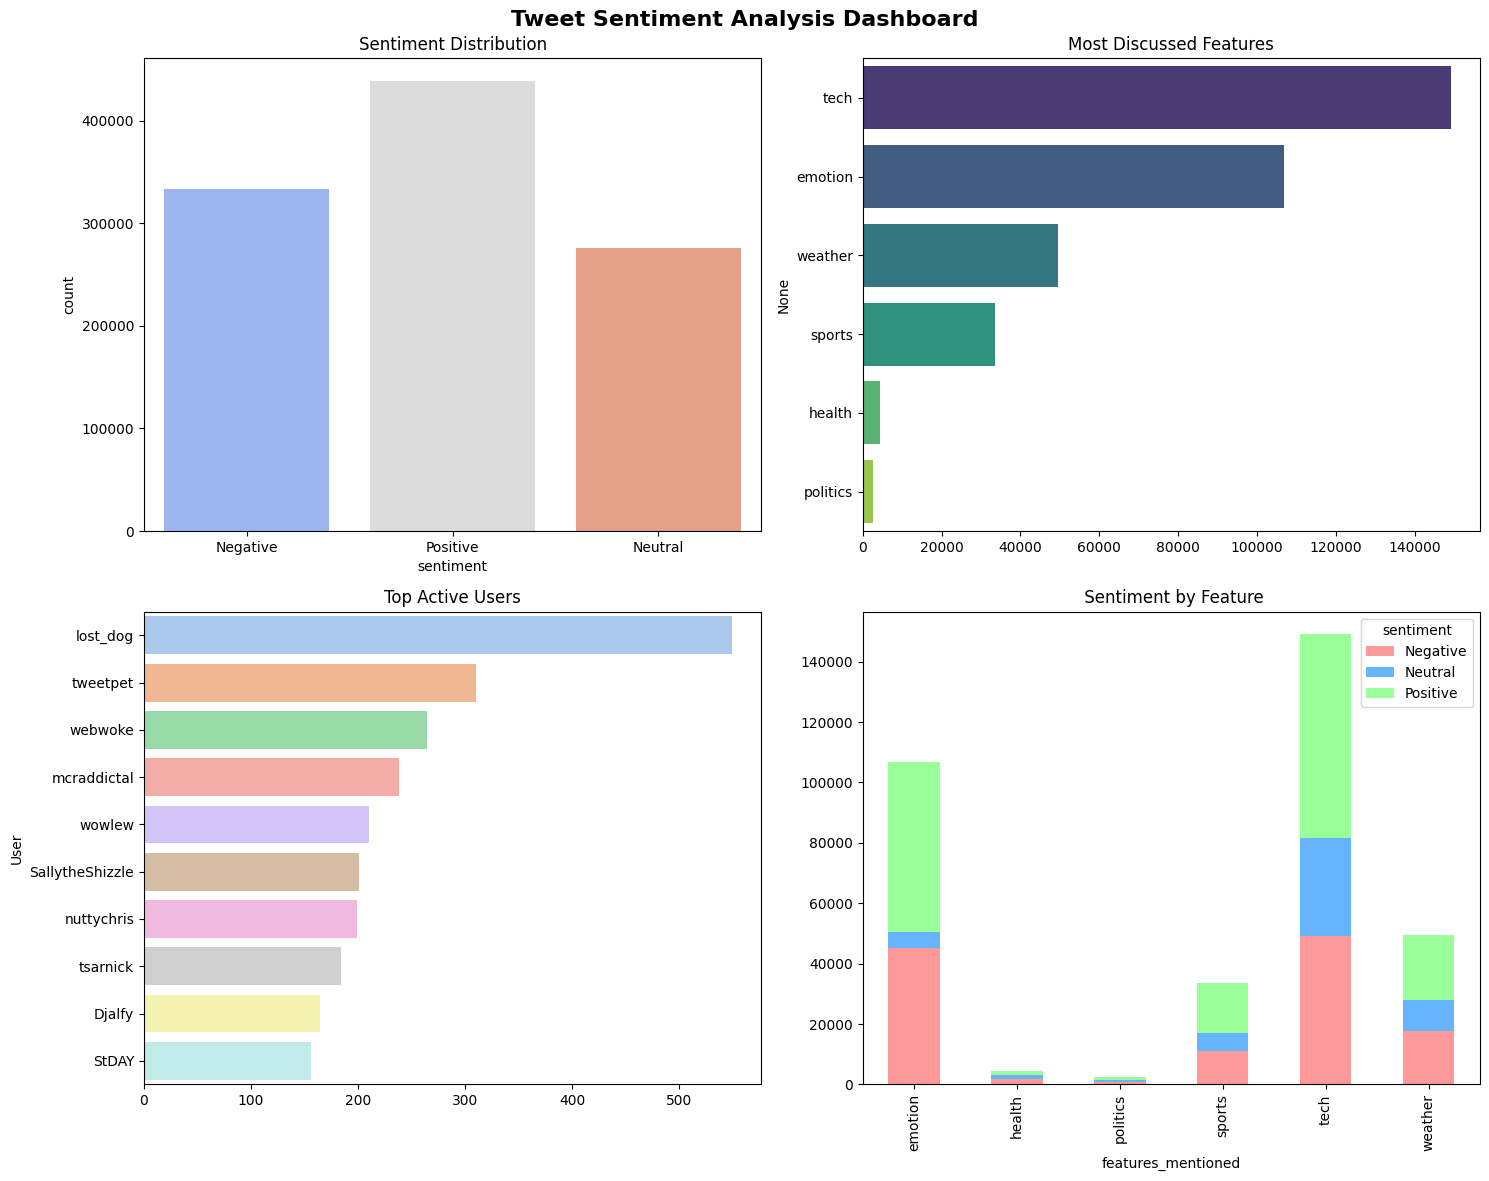

✅ Dashboard saved as 'tweet_sentiment_dashboard.png'


In [ ]:
# AI-Powered Tweet Sentiment Analyzer: NLP-Based Insight Dashboard



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

print("Libraries & NLTK resources ready!")

#LOAD DATASET

df = pd.read_csv("/content/drive/MyDrive/tweets.csv", encoding='latin1')
print("✅ Dataset loaded successfully!\n")
print(df.head())

# Check columns — usually dataset has 'Text' column for tweets
if 'Text' in df.columns:
    text_column = 'Text'
elif 'tweet' in df.columns:
    text_column = 'tweet'
else:
    raise KeyError(" No suitable text column found! Make sure your dataset has a 'Text' or 'tweet' column.")

#TEXT CLEANING
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text)
    text = re.sub(r'http\S+', '', text)          # remove URLs
    text = re.sub(r'@\w+', '', text)             # remove mentions
    text = re.sub(r'#\w+', '', text)             # remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)      # remove punctuation/numbers
    text = text.lower()                          # lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_text'] = df[text_column].apply(clean_text)
print("✅ Text cleaning completed!")
print(df[['cleaned_text']].head())

#SENTIMENT ANALYSIS
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    blob = TextBlob(text)
    vader_score = sid.polarity_scores(text)['compound']
    polarity = blob.sentiment.polarity

    # Combine both models
    avg_score = (vader_score + polarity) / 2

    if avg_score > 0.05:
        return 'Positive'
    elif avg_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['cleaned_text'].apply(analyze_sentiment)
print("✅ Sentiment analysis completed!")
print(df[['cleaned_text', 'sentiment']].head())

# FEATURE EXTRACTION

def extract_features(text):
    features = []
    keywords = {
        'weather': ['rain', 'sunny', 'storm', 'hot', 'cold', 'cloud'],
        'emotion': ['happy', 'sad', 'angry', 'love', 'hate', 'excited'],
        'tech': ['ai', 'app', 'software', 'tech', 'data', 'device'],
        'sports': ['game', 'match', 'goal', 'team', 'win', 'player'],
        'politics': ['government', 'election', 'vote', 'policy', 'leader'],
        'health': ['covid', 'virus', 'doctor', 'hospital', 'vaccine'],
    }

    for feature, words in keywords.items():
        if any(word in text for word in words):
            features.append(feature)

    return features

df['features_mentioned'] = df['cleaned_text'].apply(extract_features)
print("✅ Feature extraction completed!")

# INSIGHTS GENERATION
def generate_insights(df):
    insights = []
    total = len(df)
    positive = (df['sentiment'] == 'Positive').sum()
    negative = (df['sentiment'] == 'Negative').sum()

    pos_pct = (positive / total) * 100
    neg_pct = (negative / total) * 100

    insights.append(f"📈 Positive Tweets: {pos_pct:.1f}%")
    insights.append(f"📉 Negative Tweets: {neg_pct:.1f}%")

    all_features = [f for sublist in df['features_mentioned'] for f in sublist]
    if all_features:
        common_features = Counter(all_features).most_common(1)[0][0]
        insights.append(f" Most Discussed Topic: {common_features.capitalize()}")

    return insights

business_insights = generate_insights(df)
print("\n BUSINESS INSIGHTS:")
for i in business_insights:
    print("•", i)

# VISUALIZATION

plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Tweet Sentiment Analysis Dashboard', fontsize=16, fontweight='bold')

# Sentiment Distribution
sns.countplot(x='sentiment', data=df, palette='coolwarm', ax=axes[0,0])
axes[0,0].set_title('Sentiment Distribution')

# Feature Mentions
all_features = [f for sublist in df['features_mentioned'] for f in sublist]
if all_features:
    feat_counts = pd.Series(all_features).value_counts().head(8)
    sns.barplot(x=feat_counts.values, y=feat_counts.index, palette='viridis', ax=axes[0,1])
    axes[0,1].set_title('Most Discussed Features')
else:
    axes[0,1].text(0.5, 0.5, 'No features detected', ha='center', va='center')

# Top Users (if available)
if 'User' in df.columns:
    top_users = df['User'].value_counts().head(10)
    sns.barplot(x=top_users.values, y=top_users.index, palette='pastel', ax=axes[1,0])
    axes[1,0].set_title('Top Active Users')

# Sentiment by Feature (if any)
if all_features:
    sentiment_counts = df.explode('features_mentioned').groupby(['features_mentioned','sentiment']).size().unstack(fill_value=0)
    sentiment_counts.plot(kind='bar', stacked=True, ax=axes[1,1], color=['#ff9999','#66b3ff','#99ff99'])
    axes[1,1].set_title(' Sentiment by Feature')
else:
    axes[1,1].text(0.5, 0.5, 'Not enough feature data', ha='center', va='center')

plt.tight_layout()
plt.savefig('tweet_sentiment_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Dashboard saved as 'tweet_sentiment_dashboard.png'")


✅ Libraries imported successfully!
TextBlob Test: 'I love this product! It's amazing.'
Sentiment: Sentiment(polarity=0.6125, subjectivity=0.75)
Polarity: 0.6125

VADER Test: 'I love this product! It's amazing. 😍'
Scores: {'neg': 0.0, 'neu': 0.266, 'pos': 0.734, 'compound': 0.8516}

🎉 All tests passed! You're ready for sentiment analysis.
                                     text sentiment  compound_score
0      I love this product! It's amazing!  Positive          0.8619
1  This is terrible, worst purchase ever.  Negative         -0.8020
2             It's okay, nothing special.  Negative         -0.0920
3                OMG this is fantastic! 😍  Positive          0.5983
4     Not good at all, very disappointed.  Negative         -0.7003
✅ NLTK data downloaded successfully!
✅ All libraries imported successfully!
📊 Sample Data Created:
                                              review  rating  \
0  Absolutely love this product! The battery life...       5   
1  Terrible quality. Stop

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


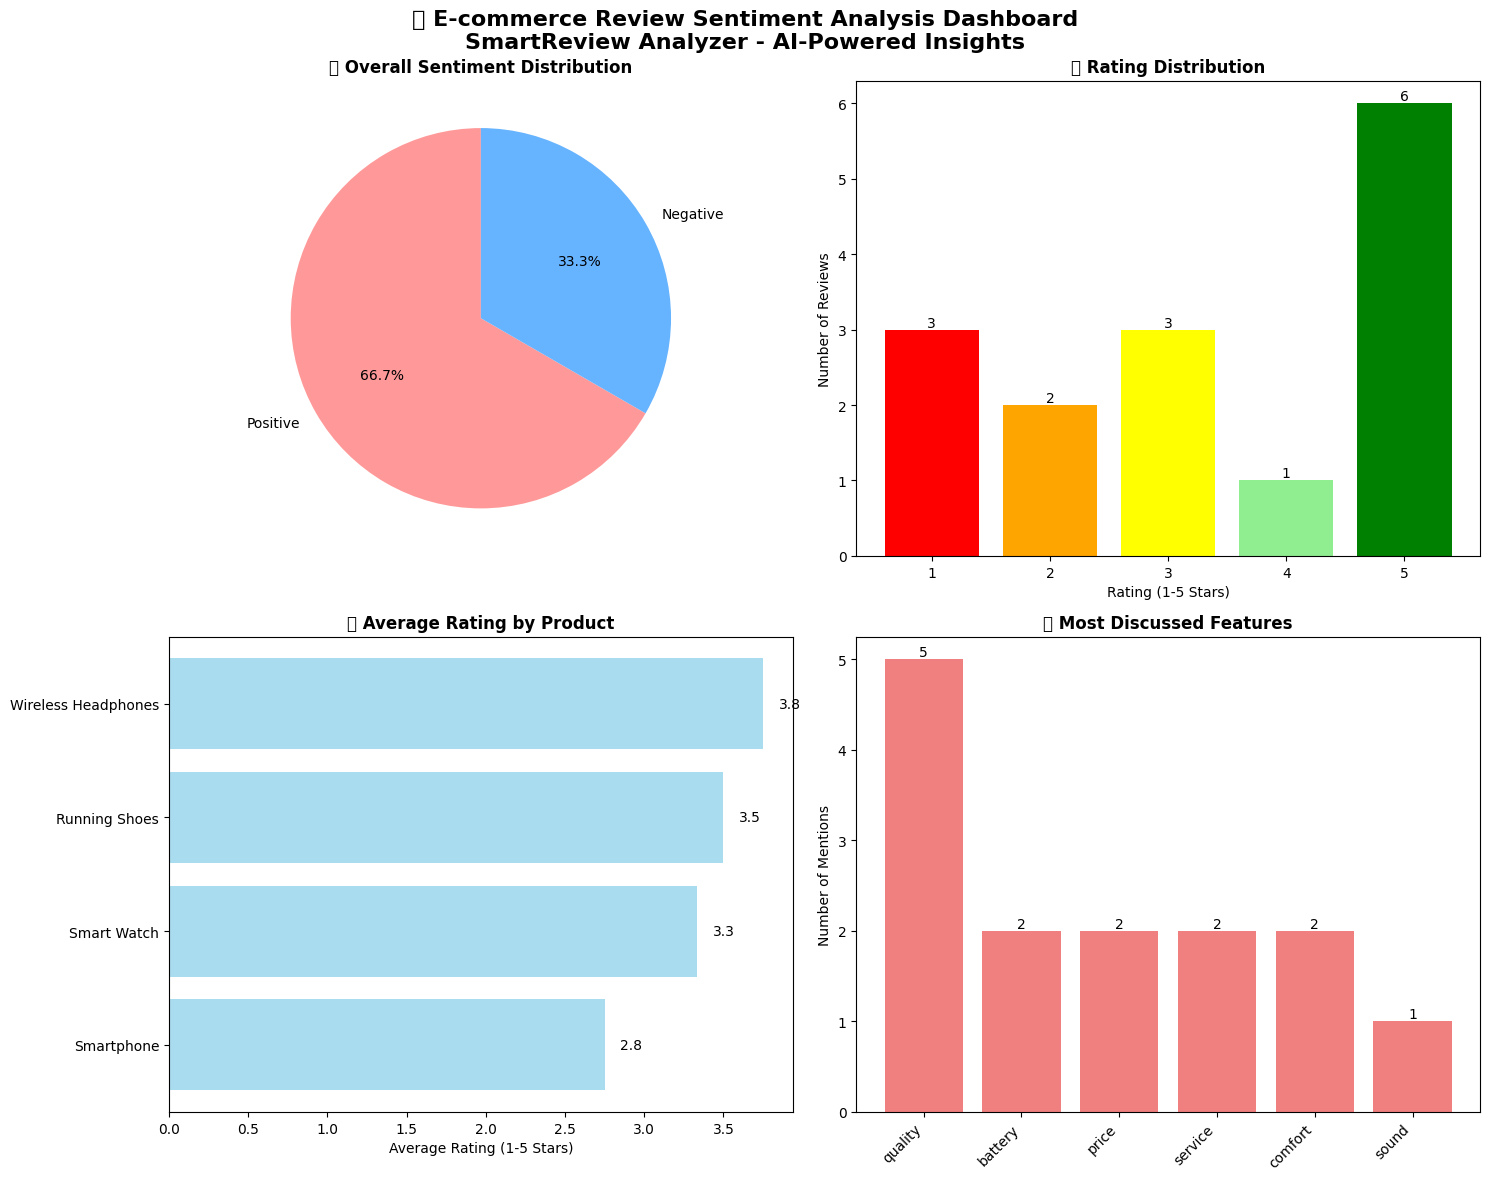

✅ Dashboard saved as 'sentiment_analysis_dashboard.png'


In [ ]:
# test_sentiment.py
import pandas as pd
import nltk
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download required NLTK data
nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)

print("✅ Libraries imported successfully!")

# Test with TextBlob
def test_textblob():
    text = "I love this product! It's amazing."
    analysis = TextBlob(text)
    print(f"TextBlob Test: '{text}'")
    print(f"Sentiment: {analysis.sentiment}")
    print(f"Polarity: {analysis.sentiment.polarity}")
    print()

# Test with VADER
def test_vader():
    sid = SentimentIntensityAnalyzer()
    text = "I love this product! It's amazing. 😍"
    scores = sid.polarity_scores(text)
    print(f"VADER Test: '{text}'")
    print(f"Scores: {scores}")
    print()

if __name__ == "__main__":
    test_textblob()
    test_vader()
    print("🎉 All tests passed! You're ready for sentiment analysis.")


    import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon (run this once)
nltk.download('vader_lexicon')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Sample data - replace this with your own dataset
sample_data = {
    'text': [
        "I love this product! It's amazing!",
        "This is terrible, worst purchase ever.",
        "It's okay, nothing special.",
        "OMG this is fantastic! 😍",
        "Not good at all, very disappointed."
    ]
}

df = pd.DataFrame(sample_data)

def analyze_sentiment_vader(text):
    scores = sid.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['sentiment'] = df['text'].apply(analyze_sentiment_vader)
df['compound_score'] = df['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

print(df)



# Title: "SmartReview Analyzer - AI-Powered Product Insight Platform"
# Analyzes product reviews to extract sentiment (Positive/Negative/Neutral)

# Identifies most loved/hated product features

# Provides actionable business recommendations

# Beautiful, interactive dashboard
#Phase 1: Data Collection & Preparation
# portfolio_project.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
try:
    nltk.download('stopwords')
    nltk.download('punkt')
    print("✅ NLTK data downloaded successfully!")
except:
    print("⚠️ NLTK data already downloaded or download failed - continuing anyway...")

print("✅ All libraries imported successfully!")

# Create sample e-commerce review data
def create_sample_data():
    sample_reviews = [
        {"review": "Absolutely love this product! The battery life is amazing and it's so easy to use.", "rating": 5, "product": "Wireless Headphones"},
        {"review": "Terrible quality. Stopped working after 2 days. Very disappointed.", "rating": 1, "product": "Wireless Headphones"},
        {"review": "Good value for money. Sound quality is decent but could be better.", "rating": 4, "product": "Wireless Headphones"},
        {"review": "The camera quality is outstanding! Best smartphone I've ever owned.", "rating": 5, "product": "Smartphone"},
        {"review": "Overpriced and the screen scratches too easily. Not worth it.", "rating": 2, "product": "Smartphone"},
        {"review": "Average phone. Nothing special but gets the job done.", "rating": 3, "product": "Smartphone"},
        {"review": "Comfortable and stylish. Perfect for daily wear.", "rating": 5, "product": "Running Shoes"},
        {"review": "Poor quality. Sole came apart after one month of use.", "rating": 1, "product": "Running Shoes"},
        {"review": "Fit is a bit tight but otherwise good shoes for the price.", "rating": 3, "product": "Running Shoes"},
        {"review": "Fast delivery and excellent packaging. Product works perfectly!", "rating": 5, "product": "Smart Watch"},
        {"review": "Battery drains too quickly. Not what I expected.", "rating": 2, "product": "Smart Watch"},
        {"review": "Interface is confusing but features are good.", "rating": 3, "product": "Smart Watch"},
        {"review": "Amazing product! Would definitely buy again.", "rating": 5, "product": "Wireless Headphones"},
        {"review": "Worst purchase ever. Complete waste of money.", "rating": 1, "product": "Smartphone"},
        {"review": "Excellent customer service and great product quality.", "rating": 5, "product": "Running Shoes"}
    ]
    return pd.DataFrame(sample_reviews)

# Create the dataset
df = create_sample_data()
print("📊 Sample Data Created:")
print(df.head())
print(f"\nTotal reviews: {len(df)}")


#Phase 2: Text Preprocessing
# Text cleaning function
def clean_text(text):
    # Convert to string to handle any non-string values
    text = str(text)

    # Remove special characters and digits, keep only letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text

# Apply cleaning
df['cleaned_review'] = df['review'].apply(clean_text)
print("✅ Text cleaning completed!")

# Feature extraction - common product aspects
def extract_features(text):
    features = []
    feature_keywords = {
        'battery': ['battery', 'charge', 'power', 'charging'],
        'quality': ['quality', 'durable', 'strong', 'sturdy'],
        'price': ['price', 'cost', 'expensive', 'cheap', 'affordable'],
        'design': ['design', 'look', 'style', 'appearance', 'beautiful'],
        'performance': ['performance', 'speed', 'fast', 'slow', 'lag'],
        'comfort': ['comfort', 'comfortable', 'fit', 'lightweight'],
        'sound': ['sound', 'audio', 'volume', 'noise', 'quiet'],
        'service': ['service', 'delivery', 'packaging', 'support']
    }

    for feature, keywords in feature_keywords.items():
        if any(keyword in text for keyword in keywords):
            features.append(feature)

    return features

df['features_mentioned'] = df['cleaned_review'].apply(extract_features)
print("✅ Feature extraction completed!")

#Phase 3: Sentiment Analysis Engine
# Enhanced sentiment analysis with TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity > 0.1:
        return 'Positive', polarity, '🟢'
    elif polarity < -0.1:
        return 'Negative', polarity, '🔴'
    else:
        return 'Neutral', polarity, '🟡'

# Apply sentiment analysis
sentiment_results = df['cleaned_review'].apply(analyze_sentiment)
df['sentiment'] = sentiment_results.apply(lambda x: x[0])
df['sentiment_score'] = sentiment_results.apply(lambda x: x[1])
df['sentiment_emoji'] = sentiment_results.apply(lambda x: x[2])

print("✅ Sentiment analysis completed!")
print("\n📊 Sentiment Distribution:")
print(df['sentiment'].value_counts())

# Phase 4: Advanced Analytics & Insights
# Business insights generation
def generate_insights(df):
    insights = []

    # Overall sentiment insights
    total_reviews = len(df)
    positive_pct = (df['sentiment'] == 'Positive').sum() / total_reviews * 100
    negative_pct = (df['sentiment'] == 'Negative').sum() / total_reviews * 100

    insights.append(f"📈 Overall Positive Reviews: {positive_pct:.1f}%")
    insights.append(f"📉 Overall Negative Reviews: {negative_pct:.1f}%")

    # Product performance comparison
    product_performance = df.groupby('product').agg({
        'rating': 'mean',
        'sentiment': lambda x: (x == 'Positive').sum() / len(x) * 100
    }).round(2)

    best_product = product_performance['rating'].idxmax()
    worst_product = product_performance['rating'].idxmin()

    insights.append(f"🏆 Best Performing Product: {best_product} (Rating: {product_performance.loc[best_product, 'rating']})")
    insights.append(f"⚠️ Needs Improvement: {worst_product} (Rating: {product_performance.loc[worst_product, 'rating']})")

    # Feature sentiment analysis
    all_features = [feature for sublist in df['features_mentioned'] for feature in sublist]
    feature_counts = Counter(all_features)

    if feature_counts:
        most_discussed = feature_counts.most_common(1)[0][0]
        insights.append(f"🔍 Most Discussed Feature: {most_discussed}")

    return insights

# Generate insights
business_insights = generate_insights(df)
print("\n💡 BUSINESS INSIGHTS:")
for insight in business_insights:
    print(f"• {insight}")

# Show sample of analyzed data
print("\n📋 Sample of Analyzed Reviews:")
sample_display = df[['product', 'review', 'rating', 'sentiment', 'sentiment_emoji']].head()
print(sample_display.to_string(index=False))

# Phase 5: Visualization Dashboard
# Create comprehensive visualizations without wordcloud
def create_dashboard(df):
    plt.style.use('default')
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('📊 E-commerce Review Sentiment Analysis Dashboard\nSmartReview Analyzer - AI-Powered Insights',
                 fontsize=16, fontweight='bold', y=0.98)

    # 1. Sentiment Distribution (Pie Chart)
    sentiment_counts = df['sentiment'].value_counts()
    colors = ['#ff9999', '#66b3ff', '#99ff99']  # Red, Blue, Green
    axes[0,0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
                  colors=colors, startangle=90)
    axes[0,0].set_title('🎭 Overall Sentiment Distribution', fontweight='bold')

    # 2. Rating Distribution
    rating_counts = df['rating'].value_counts().sort_index()
    bars = axes[0,1].bar(rating_counts.index, rating_counts.values,
                        color=['red', 'orange', 'yellow', 'lightgreen', 'green'])
    axes[0,1].set_title('⭐ Rating Distribution', fontweight='bold')
    axes[0,1].set_xlabel('Rating (1-5 Stars)')
    axes[0,1].set_ylabel('Number of Reviews')

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[0,1].text(bar.get_x() + bar.get_width()/2., height,
                      f'{int(height)}', ha='center', va='bottom')

    # 3. Product Performance Comparison
    product_stats = df.groupby('product').agg({
        'rating': 'mean',
        'sentiment_score': 'mean'
    }).sort_values('rating', ascending=True)

    y_pos = np.arange(len(product_stats))
    axes[1,0].barh(y_pos, product_stats['rating'], color='skyblue', alpha=0.7)
    axes[1,0].set_yticks(y_pos)
    axes[1,0].set_yticklabels(product_stats.index)
    axes[1,0].set_title('📈 Average Rating by Product', fontweight='bold')
    axes[1,0].set_xlabel('Average Rating (1-5 Stars)')

    # Add rating values on bars
    for i, v in enumerate(product_stats['rating']):
        axes[1,0].text(v + 0.1, i, f'{v:.1f}', va='center')

    # 4. Feature Analysis (Most Discussed Features)
    all_features = [feature for sublist in df['features_mentioned'] for feature in sublist]
    if all_features:
        feature_counts = pd.Series(all_features).value_counts().head(6)
        bars = axes[1,1].bar(range(len(feature_counts)), feature_counts.values, color='lightcoral')
        axes[1,1].set_title('🔍 Most Discussed Features', fontweight='bold')
        axes[1,1].set_xticks(range(len(feature_counts)))
        axes[1,1].set_xticklabels(feature_counts.index, rotation=45, ha='right')
        axes[1,1].set_ylabel('Number of Mentions')

        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            axes[1,1].text(bar.get_x() + bar.get_width()/2., height,
                          f'{int(height)}', ha='center', va='bottom')
    else:
        axes[1,1].text(0.5, 0.5, 'No features extracted\nfrom reviews',
                      ha='center', va='center', transform=axes[1,1].transAxes)
        axes[1,1].set_title('🔍 Most Discussed Features', fontweight='bold')

    plt.tight_layout()
    plt.savefig('sentiment_analysis_dashboard.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Dashboard saved as 'sentiment_analysis_dashboard.png'")

# Generate the dashboard
print("\n🎨 Generating Professional Dashboard...")
create_dashboard(df)